# FoDS - Lab Evaluation 4
- Roll No. : CB.EN.U4CSE20208
- Name : Aravind S

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Part-1

In [3]:
df1 = pd.read_csv('advertising.csv')
df1

,Unnamed: 0.1,Unnamed: 0,TV,Radio,Newspaper,Sales
0,0,1,230.1,37.8,69.2,22.1
1,1,2,44.5,39.3,45.1,10.4
2,2,3,17.2,45.9,69.3,9.3
3,3,4,151.5,41.3,58.5,18.5
4,4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...,...
195,195,196,38.2,3.7,13.8,7.6
196,196,197,94.2,4.9,8.1,9.7
197,197,198,177.0,9.3,6.4,12.8
198,198,199,283.6,42.0,66.2,25.5


In [4]:
df1.describe()

,Unnamed: 0.1,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,57.879185,85.854236,14.846809,21.778621,5.217457
min,0.000000,1.000000,0.700000,0.000000,0.300000,1.600000
25%,49.750000,50.750000,74.375000,9.975000,12.750000,10.375000
50%,99.500000,100.500000,149.750000,22.900000,25.750000,12.900000
75%,149.250000,150.250000,218.825000,36.525000,45.100000,17.400000
max,199.000000,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  200 non-null    int64  
 1   Unnamed: 0    200 non-null    int64  
 2   TV            200 non-null    float64
 3   Radio         200 non-null    float64
 4   Newspaper     200 non-null    float64
 5   Sales         200 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 9.5 KB


In [6]:
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Question-1a

Scatter plot of money spent on TV versus Sales

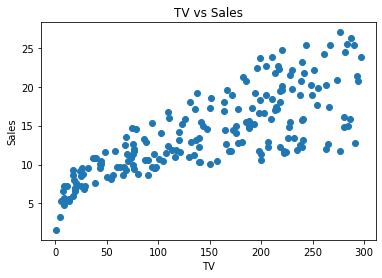

In [9]:
plt.scatter(df1['TV'], df1['Sales'])

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

plt.show()


## Question-1b

#### Pairplots for the entire dataframe

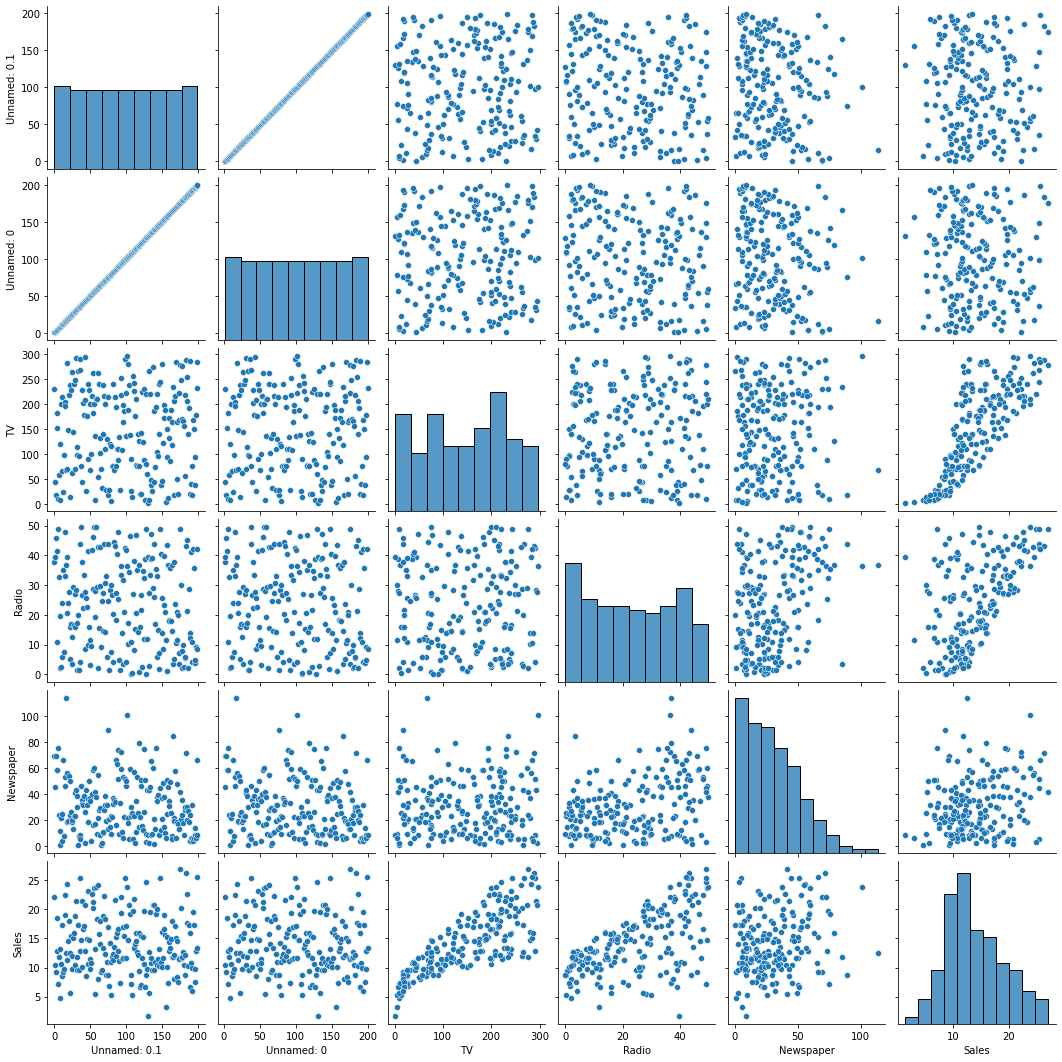

In [7]:
sns.pairplot(df1)

#### Pairplots for tv vs sales

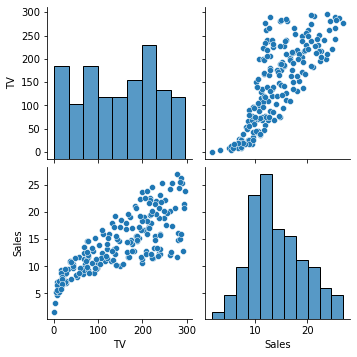

In [10]:
sns.pairplot(df1[['TV', 'Sales']])

#### Heatmap for correlation for entire dataframe

<AxesSubplot:>

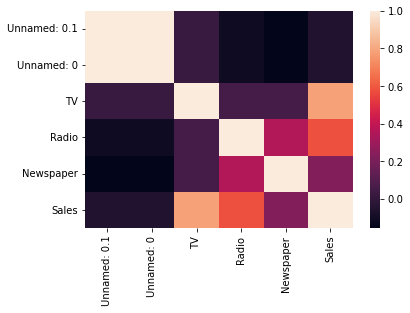

In [11]:
sns.heatmap(df1.corr())

#### Heatmap for correlation for TV and Sales

<AxesSubplot:>

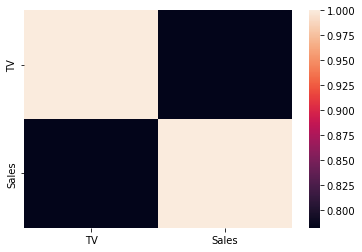

In [13]:
sns.heatmap(df1[['TV', 'Sales']].corr())

## Question-2

#### Gettign input and output variables

In [14]:
# input
X = df1[['TV']]
# output
y = df1[['Sales']]

#### Train and Test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
X_train

,TV
150,280.7
159,131.7
182,56.2
185,205.0
193,166.8
...,...
63,102.7
70,199.1
81,239.8
11,214.7


In [17]:
X_test

,TV
37,74.7
109,255.4
31,112.9
89,109.8
66,31.5
...,...
52,216.4
161,85.7
147,243.2
56,7.3


## Question-3

#### Fitting the model

In [19]:
linReg = LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

#### Getting Predictions

In [25]:
y_pred = linReg.predict(X_test)
y_pred[:10]

array([[10.64901399],
       [19.08381834],
       [12.43213256],
       [12.28742922],
       [ 8.63250293],
       [ 8.06769312],
       [19.42457137],
       [17.12332148],
       [13.71112337],
       [17.45473881]])

- These are the predicted sales data for input as TV

## Question-4

In [40]:
intercept = linReg.intercept_
coeff = linReg.coef_
print('Intercept : ', intercept[0])
print('Coefficient : ', coeff[0][0])

Intercept :  7.162130285625708
Coefficient :  0.04667849670359498


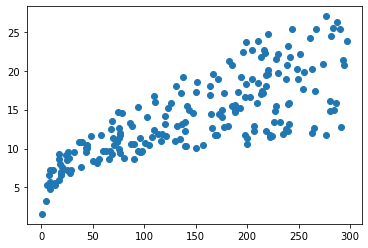

In [36]:
plt.scatter(X, y)

<AxesSubplot:xlabel='Sales'>

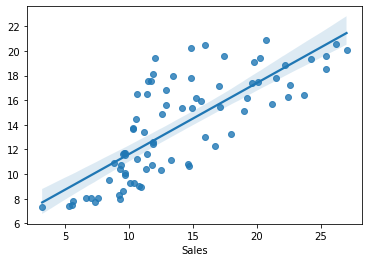

In [42]:
sns.regplot(x=y_test,y=y_pred)

## Question-5

In [45]:
ols_model = ols('TV~Sales', data=df1).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     TV   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        16:22:24   Log-Likelihood:                -1079.2
No. Observations:                 200   AIC:                             2162.
Df Residuals:                     198   BIC:                             2169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -33.4502     10.897     -3.070      0.0

eval_env: 1


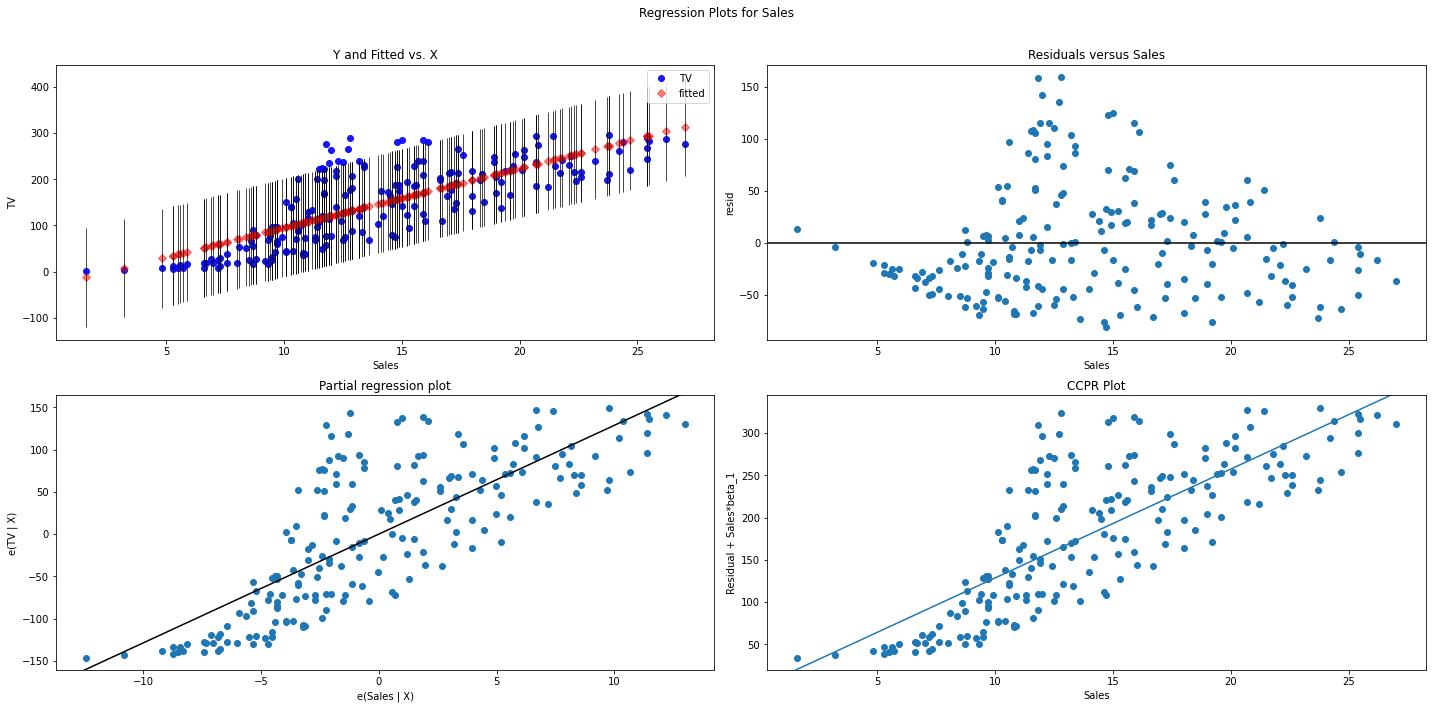

In [46]:
fig = plt.figure(figsize=(20, 10))
fig = sm.graphics.plot_regress_exog(ols_model,
                                    'Sales',
                                    fig=fig)

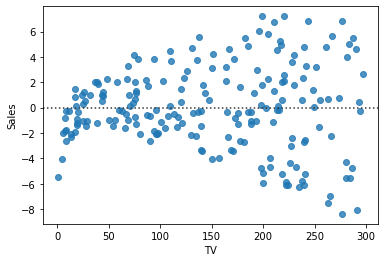

In [47]:
sns.residplot(x='TV', y='Sales', data=df1)
plt.show()

- The Points and residuals are randomly scattered around the 0 line.
- There is no regular pattern, since the points are scaterred around. 
- There is no problem of heteroscedasticity here

# Part-B

## Question-1

#### Importing the dataset

In [26]:
df2 = pd.read_csv('pima-indians-diabetes.csv')
df2

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


### Describe

In [27]:
df2.describe()

,6,148,72,35,0,33.6,0.627,50,1
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df2.columns

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')

#### Saving to hard drive

In [35]:
df2.to_csv('saved.csv', index=False)

#### Training and Testing (test_size = 20)

In [81]:
X=df2.drop(['1'],axis=1)
y=df2['1']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Question-2

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# y_train_scaled = scaler.transform(y_train)
# y_test_scaled = scaler.transform(y_test)

In [89]:
X_train_scaled

array([[-0.52868317, -1.08625225, -3.52375548, ..., -0.41028171,
         0.84038599, -0.69900975],
       [ 1.82828251,  0.23855355,  0.33794432, ...,  0.46009888,
        -0.58925132,  0.50752719],
       [-0.52868317,  2.38347722,  0.03307329, ..., -0.21133758,
        -0.94303581,  1.71406414],
       ...,
       [-1.11792458, -0.13996239, -0.17017407, ..., -0.17403555,
         0.02842159, -0.95755338],
       [-0.23406246, -0.04533341,  0.03307329, ...,  1.33047948,
        -0.09047319, -0.2681037 ],
       [-1.11792458,  0.52244051, -3.52375548, ...,  0.50983492,
         1.30436564, -0.69900975]])

In [90]:
X_test_scaled

array([[ 0.06055825,  1.02712843, -0.37342143, ...,  0.07464462,
        -0.71394586, -0.87137217],
       [-0.82330387,  1.8787893 ,  0.439568  , ...,  0.96989323,
         2.24682432, -0.95755338],
       [ 0.35517896,  1.15330041,  0.74443904, ...,  0.89528918,
        -0.25576595, -0.35428491],
       ...,
       [-0.52868317, -0.0768764 , -3.52375548, ..., -1.56664451,
         1.01147849,  3.35150713],
       [-0.82330387, -3.83049283,  0.23632064, ..., -0.55948982,
        -0.53415374, -1.04373459],
       [ 0.64979967, -0.32922036, -0.27179775, ...,  0.24872074,
        -0.64724878, -0.78519096]])

## Question-3

In [92]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

## Question-4

In [93]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
print(mat)

[[89 18]
 [23 24]]


<AxesSubplot:>

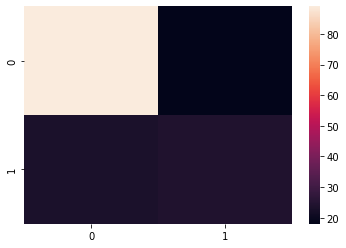

In [94]:
sns.heatmap(mat)

## Question-5

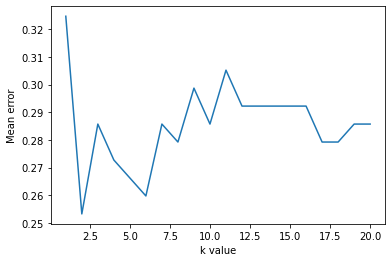

In [95]:
mean_errors = []


for k in range(1, 21):
 
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  predictions = knn.predict(X_test_scaled)
  
  mean_error = 1 - knn.score(X_test_scaled, y_test)
  mean_errors.append(mean_error)
  
plt.plot(range(1, 21), mean_errors)
plt.xlabel("k value")
plt.ylabel("Mean error")
plt.show()



In [96]:
#end